In [1]:
from sim_lib.sim_results import ManySimResults, SimResults
from sim_lib.sim_data import SimParams
from sim_lib.sim_model import SimModel
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import os
import pyjags

In [2]:
sim = SimResults.load("outputs/testing2/sim_summary_6269427566608793589")

{'psi': 0.5, 'p11': 0.9, 'p_aru11': 0.1, 'p_aru01': 0.05, 'beta0': -1, 'beta1': 1, 'mu': [-2, -1.75], 'sigma': [0.25, 1], 'nsites': 80, 'nsurveys_aru': 24, 'nsurveys_scores': 24, 'nsurveys_pc': 3, 'covar_continuous': True, 'covar_prob': 0.5, 'threshold': 0, 'tau': (16.0, 1.0), 'siteid': (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80), 'nsamples': 80, 'covar': 1.0, 'psi_prior': 'dbeta(2,2)', 'beta0_prior': 'dnorm(0, 0.5)', 'beta1_prior': 'dnorm(0, 0.5)', 'p11_prior': 'dbeta(2, 2)', 'mu1_prior': 'dnorm(-2, 0.2)', 'mu2_prior': 'dnorm(-2, 0.2)', 'sigma1_prior': 'dunif(0.1, 5)', 'sigma2_prior': 'dunif(0.1, 5)', 'p_aru11_prior': 'dbeta(2, 2)', 'p_aru01_prior': 'dbeta(1, 3)I(0, 1 - p_aru11)', 'na': 1000, 'ni': 8000, 'nt': 1, 'nb': 10

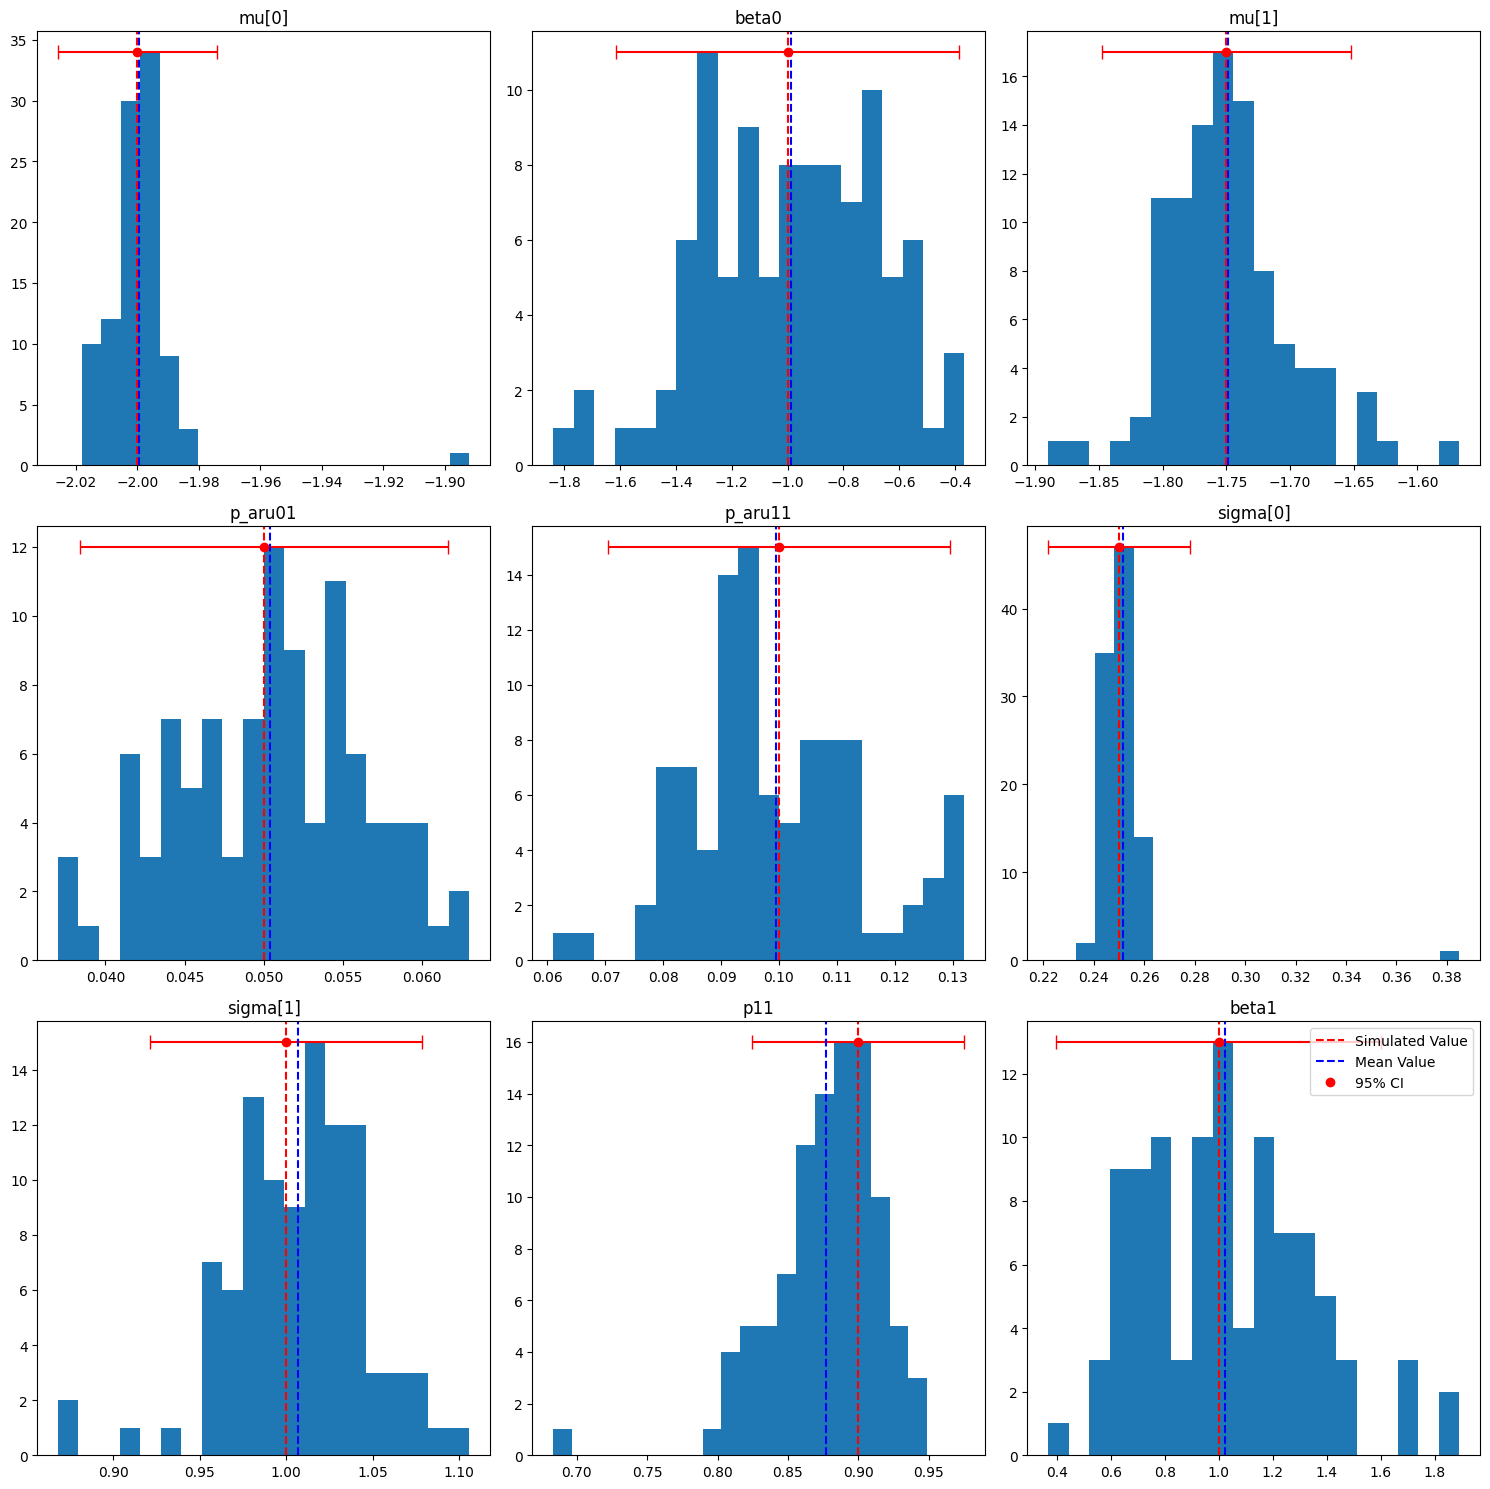

In [3]:
sim.plot_summary_hists(func="mean")

# Hashing Tests Below!

In [3]:
sim_params0 = SimParams(psi=0.25)

results = SimResults(sim_params0)

results.save("outputs/test1hash")

sim_params1 = SimResults.load("outputs/test1hash").sim_params

hash0 = hash(sim_params0)
hash1 = hash(sim_params1)

sim0_dict = sim_params0.__dict__
sim1_dict = sim_params1.__dict__

hash0, hash1

(1748704323536501752, 1748704323536501752)

In [ ]:
many_sims = ManySimResults("outputs/testing2")

  0%|          | 0/6461 [00:00<?, ?it/s]

  0%|          | 14/6461 [00:04<34:25,  3.12it/s]

In [6]:
many_sims.sim_results_index.filter(
    pl.col("within_ci") == False
)

psi,p11,p_aru11,p_aru01,beta0,beta1,mu,sigma,nsites,nsurveys_aru,nsurveys_scores,nsurveys_pc,covar_continuous,covar_prob,threshold,tau,siteid,nsamples,covar,psi_prior,beta0_prior,beta1_prior,p11_prior,mu1_prior,mu2_prior,sigma1_prior,sigma2_prior,p_aru11_prior,p_aru01_prior,na,ni,nt,nb,nc,parallel,include_aru_data,include_pc_data,include_scores_data,include_covar_data,include_aru_model,include_pc_model,include_scores_model,include_covar_model,aru_scores_independent_model,dir_name,n_sims,within_ci
f64,f64,f64,f64,i64,i64,list[f64],list[f64],i64,i64,i64,i64,bool,f64,i64,list[f64],list[i64],i64,f64,str,str,str,str,str,str,str,str,str,str,i64,i64,i64,i64,i64,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,str,i64,bool


In [19]:
many_sims.sim_results_index.filter(
    pl.col("n_sims") > 90,
    pl.col("p_aru01") == 0.05,
    pl.col("p_aru11") == 0.1,
)[2]["dir_name"][0]

'sim_summary_6269427566608793589'

In [10]:
many_sims.sim_results_index.filter(
    pl.col("n_sims") == 99
)

psi,p11,p_aru11,p_aru01,beta0,beta1,mu,sigma,nsites,nsurveys_aru,nsurveys_scores,nsurveys_pc,covar_continuous,covar_prob,threshold,tau,siteid,nsamples,covar,psi_prior,beta0_prior,beta1_prior,p11_prior,mu1_prior,mu2_prior,sigma1_prior,sigma2_prior,p_aru11_prior,p_aru01_prior,na,ni,nt,nb,nc,parallel,include_aru_data,include_pc_data,include_scores_data,include_covar_data,include_aru_model,include_pc_model,include_scores_model,include_covar_model,aru_scores_independent_model,dir_name,n_sims
f64,f64,f64,f64,i64,i64,list[f64],list[f64],i64,i64,i64,i64,bool,f64,i64,list[f64],list[i64],i64,f64,str,str,str,str,str,str,str,str,str,str,i64,i64,i64,i64,i64,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,str,i64
0.5,0.9,0.9,0.05,-1,1,"[-2.0, 0.0]","[0.25, 1.0]",80,24,24,3,true,0.5,-1,"[16.0, 1.0]","[1, 2, … 80]",80,1.0,"""dbeta(2,2)""","""dnorm(0, 0.5)""","""dnorm(0, 0.5)""","""dbeta(2, 2)""","""dnorm(-2, 0.2)""","""dnorm(-2, 0.2)""","""dunif(0.1, 5)""","""dunif(0.1, 5)""","""dbeta(2, 2)""","""dbeta(1, 3)I(0, 1 - p_aru11)""",1000,8000,1,1000,6,true,true,true,true,true,true,true,true,true,true,"""sim_summary_-42359917392954733…",99
0.5,0.9,0.9,0.05,-1,-1,"[-2.0, -1.75]","[0.25, 1.0]",80,24,8,3,true,0.5,1,"[16.0, 1.0]","[1, 2, … 80]",80,1.0,"""dbeta(2,2)""","""dnorm(0, 0.5)""","""dnorm(0, 0.5)""","""dbeta(2, 2)""","""dnorm(-2, 0.2)""","""dnorm(-2, 0.2)""","""dunif(0.1, 5)""","""dunif(0.1, 5)""","""dbeta(2, 2)""","""dbeta(1, 3)I(0, 1 - p_aru11)""",1000,8000,1,1000,6,true,true,true,true,true,true,true,true,true,true,"""sim_summary_-13830928767642507…",99
0.5,0.9,0.9,0.05,-1,1,"[-2.0, -1.75]","[0.25, 1.0]",200,24,8,3,true,0.5,-1,"[16.0, 1.0]","[1, 2, … 200]",200,1.0,"""dbeta(2,2)""","""dnorm(0, 0.5)""","""dnorm(0, 0.5)""","""dbeta(2, 2)""","""dnorm(-2, 0.2)""","""dnorm(-2, 0.2)""","""dunif(0.1, 5)""","""dunif(0.1, 5)""","""dbeta(2, 2)""","""dbeta(1, 3)I(0, 1 - p_aru11)""",1000,8000,1,1000,6,true,true,true,true,true,true,true,true,true,true,"""sim_summary_959587495922396774""",99
0.5,0.9,0.9,0.05,-1,-1,"[-2.0, -1.75]","[0.25, 1.0]",80,24,8,3,true,0.5,0,"[16.0, 1.0]","[1, 2, … 80]",80,1.0,"""dbeta(2,2)""","""dnorm(0, 0.5)""","""dnorm(0, 0.5)""","""dbeta(2, 2)""","""dnorm(-2, 0.2)""","""dnorm(-2, 0.2)""","""dunif(0.1, 5)""","""dunif(0.1, 5)""","""dbeta(2, 2)""","""dbeta(1, 3)I(0, 1 - p_aru11)""",1000,8000,1,1000,6,true,true,true,true,true,true,true,true,true,true,"""sim_summary_-11640585472376860…",99
0.5,0.9,0.9,0.05,-1,-1,"[-2.0, -1.75]","[0.25, 1.0]",200,24,8,3,true,0.5,0,"[16.0, 1.0]","[1, 2, … 200]",200,1.0,"""dbeta(2,2)""","""dnorm(0, 0.5)""","""dnorm(0, 0.5)""","""dbeta(2, 2)""","""dnorm(-2, 0.2)""","""dnorm(-2, 0.2)""","""dunif(0.1, 5)""","""dunif(0.1, 5)""","""dbeta(2, 2)""","""dbeta(1, 3)I(0, 1 - p_aru11)""",1000,8000,1,1000,6,true,true,true,true,true,true,true,true,true,true,"""sim_summary_203347556314477443…",99
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
0.5,0.9,0.9,0.05,-1,1,"[-2.0, -1.75]","[0.25, 1.0]",80,24,24,3,true,0.5,-1,"[16.0, 1.0]","[1, 2, … 80]",80,1.0,"""dbeta(2,2)""","""dnorm(0, 0.5)""","""dnorm(0, 0.5)""","""dbeta(2, 2)""","""dnorm(-2, 0.2)""","""dnorm(-2, 0.2)""","""dunif(0.1, 5)""","""dunif(0.1, 5)""","""dbeta(2, 2)""","""dbeta(1, 3)I(0, 1 - p_aru11)""",1000,8000,1,1000,6,true,true,true,true,true,true,true,true,true,false,"""sim_summary_794223807482150059…",99
0.5,0.9,0.9,0.05,-1,1,"[-2.0, -1.75]","[0.25, 1.0]",80,24,24,3,true,0.5,-1,"[16.0, 1.0]","[1, 2, … 80]",80,1.0,"""dbeta(2,2)""","""dnorm(0, 0.5)""","""dnorm(0, 0.5)""","""dbeta(2, 2)""","""dnorm(-2, 0.2)""","""dnorm(-2, 0.2)""","""dunif(0.1, 5)""","""dunif(0.1, 5)""","""dbeta(2, 2)""","""dbeta(1, 3)I(0, 1 - p_aru11)""",1000,8000,1,1000,6,true,true,true,true,true,true,true,true,true,true,"""sim_summary_702074112048501166…",99
0.5,0.9,0.9,0.05,-1,1,"[-2.0, -1.75]","[0.25, 1.0]",80,24,8,3,true,0.5,0,"[16.0, 1.0]","[1, 2, … 80]",80,1.0,"""dbeta(2,2)""","""dnorm(0, 0.5)""","""dnorm(0, 0.5)""","""dbeta(2, 2)""","""dnorm

In [16]:
sim = SimResults.load("outputs/testing2/sim_summary_959587495922396774")

In [19]:
len(sim.samples_list)

99

In [22]:
model = SimModel.load_from_sim_results(sim)

sampling: iterations 1 of 1, elapsed 0:00:00, remaining 0:00:00
adapting: iterations 3165 of 6000, elapsed 0:00:05, remaining 0:00:05
adapting: iterations 6000 of 6000, elapsed 0:00:08, remaining 0:00:00


In [23]:
samples = model.sample()

sampling: iterations 4385 of 48000, elapsed 0:00:06, remaining 0:01:02
sampling: iterations 12276 of 48000, elapsed 0:00:11, remaining 0:00:33
sampling: iterations 19489 of 48000, elapsed 0:00:17, remaining 0:00:25
sampling: iterations 29994 of 48000, elapsed 0:00:25, remaining 0:00:15
sampling: iterations 39326 of 48000, elapsed 0:00:31, remaining 0:00:07
sampling: iterations 46257 of 48000, elapsed 0:00:36, remaining 0:00:01
sampling: iterations 48000 of 48000, elapsed 0:00:40, remaining 0:00:00


In [24]:
sim.append_samples(samples)

In [25]:
len(sim.samples_list)

100

In [26]:
sim.save("outputs/hundredsimstest")

/home/mschulist/miniconda3/envs/COMB/lib/python3.9/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/mschulist/miniconda3/envs/COMB/lib/python3.9/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/mschulist/miniconda3/envs/COMB/lib/python3.9/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/mschulist/miniconda3/envs/COMB/lib/python3.9/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/mschulist/miniconda3/envs/COMB

In [9]:
dirs = os.listdir("outputs/testing")
sims_hashes = {int(d.split("_")[-1]) for d in dirs if "sim_summary" in d}

In [22]:
list(sims_hashes)[0]

-6611575703337566198

In [18]:
h = hash(str(sim.sim_params))

h in sims_hashes, h

(False, -4639279346650610306)

In [4]:
sim

In [17]:
p = set()

for _, sim in many_sims.sim_results.items():
    p.add(str(sim.sim_params))

In [19]:
len(many_sims.sim_results)

474

In [3]:
filtered_index = many_sims.sim_results_index.filter(
    pl.col("aru_scores_independent_model") == True
)

In [4]:
filtered_sims = many_sims.load_from_sim_results_index(filtered_index)

In [5]:
filtered_sims[0].summary["beta0"]

,Unnamed: 0,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,median
0,0,-1.253,0.307,-1.836,-0.686,0.002,0.002,21764.0,24280.0,1.0,-1.242
